In [40]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

In [42]:
miu=1
E=1
def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)

    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1)

    return -dy_xx - dy_yy - E/(1+miu)

In [43]:
def boundary(_, on_boundary):
    return on_boundary



In [96]:
geom = dde.geometry.Rectangle([-1,-1],[1,1])
bc = dde.icbc.DirichletBC(geom, lambda x: np.sin(x[:,-1]) , boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=15000, num_boundary=1000, num_test=500)

net = dde.nn.FNN([2] + [120] * 2 + [1], "tanh", "Glorot uniform")#for having time it should be 3 input probably
model = dde.Model(data, net)



Compiling model...
Building feed-forward neural network...
'build' took 0.044780 s



'compile' took 0.740981 s

Training model...

Step      Train loss              Test loss               Test metric
0         [2.51e-01, 5.44e-01]    [2.51e-01, 5.44e-01]    []  
1000      [8.78e-05, 4.90e-01]    [4.74e-05, 4.90e-01]    []  
2000      [8.98e-05, 4.90e-01]    [4.33e-05, 4.90e-01]    []  

Best model at step 2000:
  train loss: 4.90e-01
  test loss: 4.90e-01
  test metric: []

'train' took 162.813532 s

Compiling model...
'compile' took 0.606049 s

Training model...

Step      Train loss              Test loss               Test metric
2000      [8.98e-05, 4.90e-01]    [4.33e-05, 4.90e-01]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.489658
  Number of iterations: 150
  Number of functions evaluations: 174
2174      [1.18e-05, 4.90e-01]    [6.70e-06, 4.90e-01]    []  

Best model at step 2174:
  train loss: 4.90e-01
  test loss: 4.90e-01
  test metric: []

'train' took 36.20

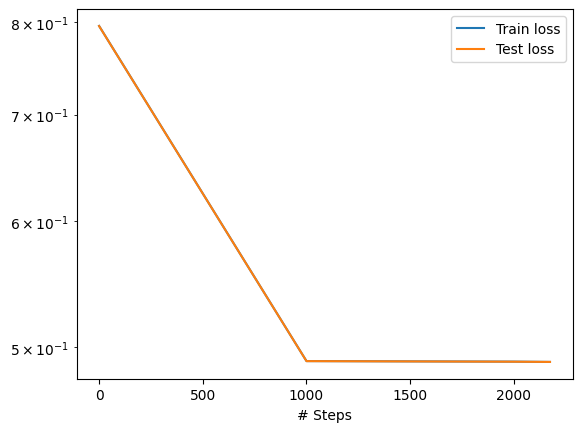

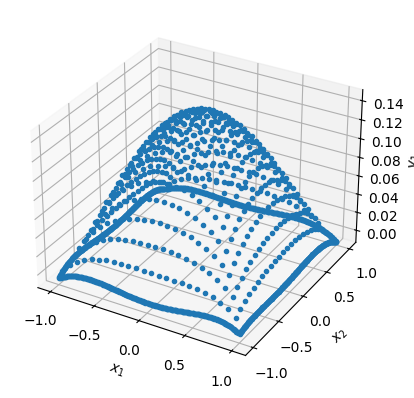

In [97]:
model.compile("adam", lr=0.01)
model.train(iterations=2000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [93]:
losshistory, train_state
# print((data.test_x))
print(losshistory)

In [70]:
print((data.train_x))

[[ 1.          1.        ]
 [ 0.         -1.        ]
 [ 0.          1.        ]
 ...
 [-0.09472656  0.9970015 ]
 [ 0.90527344  0.998001  ]
 [-0.90722656  0.99900055]]


In [73]:
# print(data.train_x ==data.test_x)
(data.train_x).shape

(4400, 2)

In [28]:
samples = geom.random_points(5000000)
result = model.predict(samples)

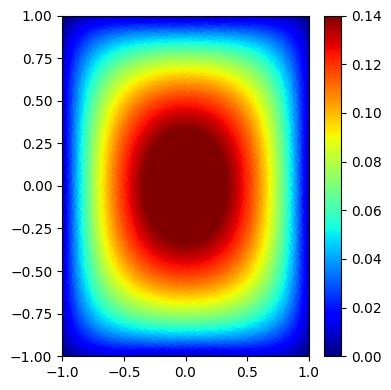

In [29]:
color_legend = [[0,0.14]]


plt.figure(figsize=(4,4))
plt.scatter(samples[:,0],
           samples[:,1],
           c = result[:],
           cmap= 'jet',
           s=2)
plt.colorbar()
plt.clim(color_legend[0])
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.tight_layout()
plt.show()

Compiling model...
Building feed-forward neural network...
'build' took 0.119248 s



c:\Users\rgh51\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.955112 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.30e+00, 2.59e-01]    [1.34e+00, 2.59e-01]    []  
1000      [4.24e-04, 2.94e-03]    [3.57e-04, 2.94e-03]    []  
2000      [1.95e-04, 2.81e-03]    [1.59e-04, 2.81e-03]    []  
3000      [1.40e-04, 2.56e-03]    [1.08e-04, 2.56e-03]    []  
4000      [2.44e-04, 2.14e-03]    [1.69e-04, 2.14e-03]    []  
5000      [2.74e-04, 1.61e-03]    [2.06e-04, 1.61e-03]    []  
6000      [5.36e-03, 2.86e-03]    [5.29e-03, 2.86e-03]    []  
7000      [1.48e-04, 4.78e-04]    [1.12e-04, 4.78e-04]    []  
8000      [1.34e-04, 3.40e-04]    [1.13e-04, 3.40e-04]    []  
9000      [7.52e-05, 2.64e-04]    [6.46e-05, 2.64e-04]    []  
10000     [5.81e-05, 2.29e-04]    [4.93e-05, 2.29e-04]    []  
11000     [9.08e-05, 2.04e-04]    [8.01e-05, 2.04e-04]    []  
12000     [4.47e-05, 1.86e-04]    [3.75e-05, 1.86e-04]    []  
13000     [3.79e-05, 1.76e-04]    [3.05e-05, 1.76e-04]    []  
14

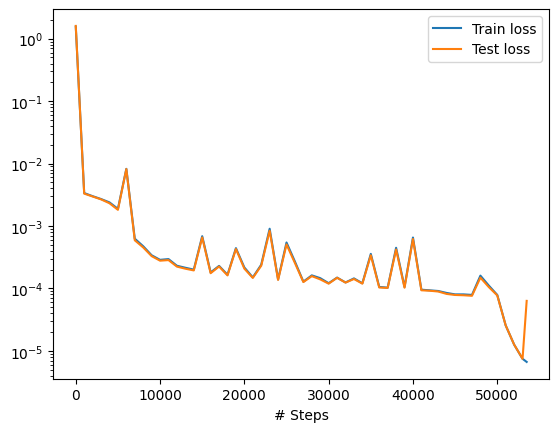

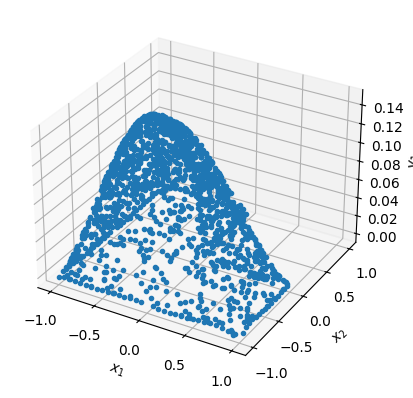

In [16]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde


def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [18]:
samples = geom.random_points(500000)
result = model.predict(samples)

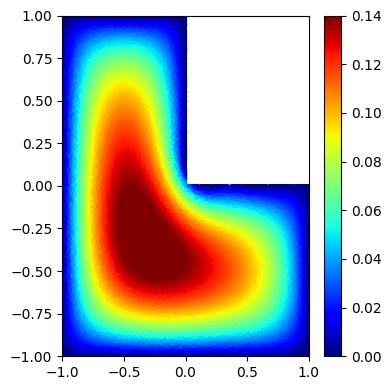

In [19]:
color_legend = [[0,0.14]]


plt.figure(figsize=(4,4))
plt.scatter(samples[:,0],
           samples[:,1],
           c = result[:],
           cmap= 'jet',
           s=2)
plt.colorbar()
plt.clim(color_legend[0])
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.tight_layout()
plt.show()

Compiling model...
Building feed-forward neural network...


c:\Users\rgh51\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.637650 s

'compile' took 2.069309 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.01e+00, 3.17e-02]    [1.01e+00, 3.17e-02]    []  
1000      [4.57e-05, 1.95e-04]    [3.96e-05, 1.95e-04]    []  
2000      [2.94e-05, 1.08e-06]    [2.47e-05, 1.08e-06]    []  
3000      [2.26e-05, 8.34e-07]    [1.90e-05, 8.34e-07]    []  
4000      [1.67e-05, 6.96e-07]    [1.42e-05, 6.96e-07]    []  
5000      [1.25e-05, 1.58e-06]    [1.06e-05, 1.58e-06]    []  
6000      [8.30e-06, 5.72e-07]    [7.06e-06, 5.72e-07]    []  
7000      [4.46e-06, 4.81e-07]    [3.77e-06, 4.81e-07]    []  
8000      [1.61e-06, 3.42e-07]    [1.31e-06, 3.42e-07]    []  
9000      [5.14e-07, 1.41e-07]    [4.16e-07, 1.41e-07]    []  
10000     [1.02e-06, 4.99e-05]    [7.75e-07, 4.99e-05]    []  
11000     [4.65e-07, 3.14e-08]    [4.08e-07, 3.14e-08]    []  
12000     [6.20e-07, 5.21e-06]    [6.29e-07, 5.21e-06]    []  
13000     [5.57e-07, 1.14e-08]    [4.80e

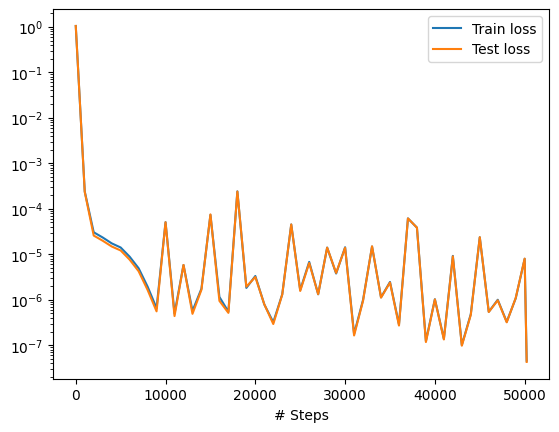

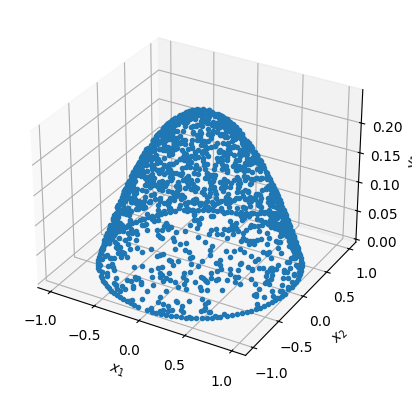

In [30]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde


def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.geometry_2d.Disk([0,0],1)
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [31]:
samples = geom.random_points(500000)
result = model.predict(samples)

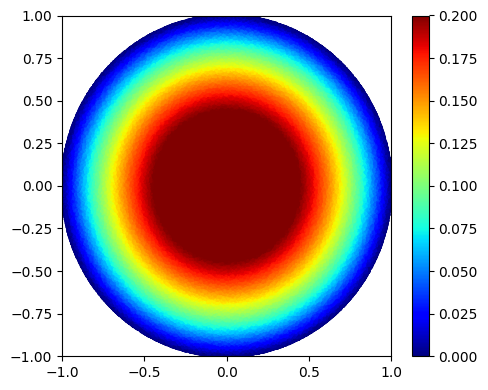

In [36]:
color_legend = [[0,0.2]]


plt.figure(figsize=(5,4))
plt.scatter(samples[:,0],
           samples[:,1],
           c = result[:],
           cmap= 'jet',
           s=2)
plt.colorbar()
plt.clim(color_legend[0])
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.tight_layout()
plt.show()

Compiling model...
Building feed-forward neural network...


c:\Users\rgh51\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.342253 s

'compile' took 1.770147 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.16e+00, 4.47e-02]    [1.16e+00, 4.47e-02]    []  
1000      [1.94e-04, 1.53e-05]    [1.63e-04, 1.53e-05]    []  
2000      [3.87e-05, 1.57e-06]    [3.24e-05, 1.57e-06]    []  
3000      [1.24e-05, 8.10e-07]    [9.94e-06, 8.10e-07]    []  
4000      [8.79e-06, 4.51e-06]    [8.27e-06, 4.51e-06]    []  
5000      [4.94e-06, 1.30e-06]    [3.98e-06, 1.30e-06]    []  
6000      [7.16e-06, 9.60e-05]    [5.83e-06, 9.60e-05]    []  
7000      [7.27e-06, 6.53e-06]    [6.40e-06, 6.53e-06]    []  
8000      [1.77e-05, 4.25e-05]    [1.88e-05, 4.25e-05]    []  
9000      [3.45e-06, 6.93e-06]    [3.27e-06, 6.93e-06]    []  
10000     [3.29e-06, 1.29e-06]    [2.92e-06, 1.29e-06]    []  
11000     [7.50e-06, 3.53e-06]    [6.55e-06, 3.53e-06]    []  
12000     [2.66e-06, 1.14e-06]    [2.40e-06, 1.14e-06]    []  
13000     [3.83e-06, 1.35e-06]    [3.27e

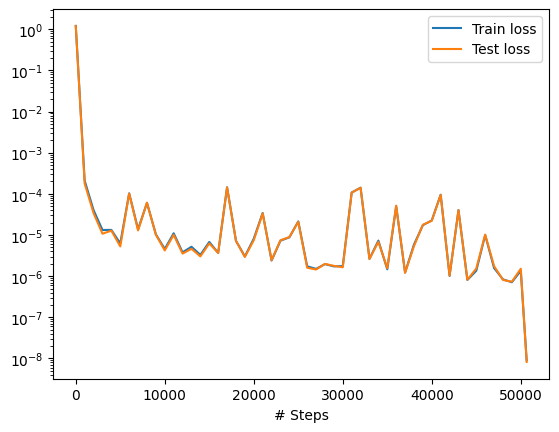

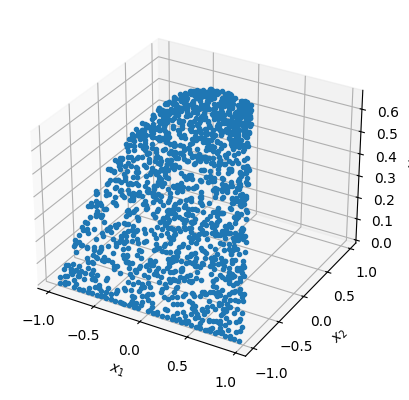

In [37]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde


def pde(x, y):
    # Most backends
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    # Backend jax
    # dy_xx, _ = dde.grad.hessian(y, x, i=0, j=0)
    # dy_yy, _ = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.geometry_2d.Triangle([0,1],[1,-1],[-1,-1])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [38]:
samples = geom.random_points(50000)
result = model.predict(samples)

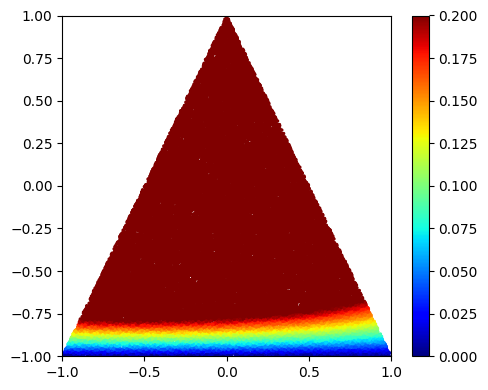

In [39]:
color_legend = [[0,0.2]]


plt.figure(figsize=(5,4))
plt.scatter(samples[:,0],
           samples[:,1],
           c = result[:],
           cmap= 'jet',
           s=2)
plt.colorbar()
plt.clim(color_legend[0])
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.tight_layout()
plt.show()